In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'package')

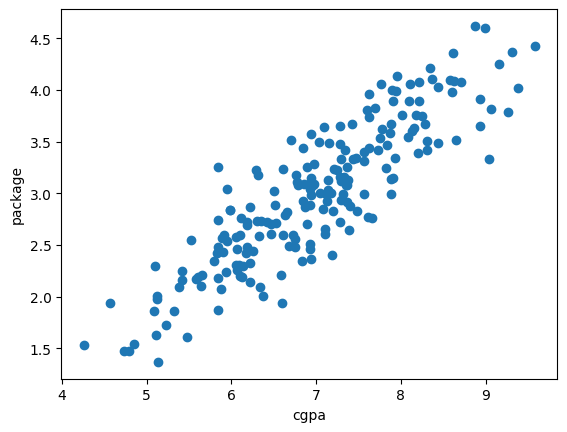

In [94]:
plt.scatter(x=df.iloc[:,0],y=df.iloc[:,1])
plt.xlabel('cgpa')
plt.ylabel('package')

In [95]:
X = df.iloc[:,0]
y = df.iloc[:,1]

In [96]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [97]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

Text(0, 0.5, 'package')

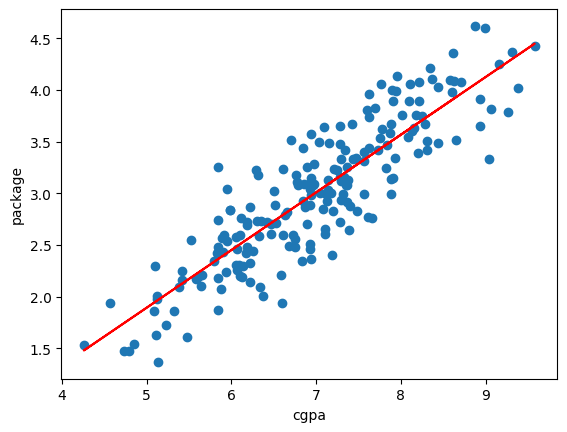

In [99]:
plt.scatter(x=df['cgpa'],y=df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [101]:
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 0.2884710931878175


In [102]:
print("MSE",mean_squared_error(y_test,y_pred))


MSE 0.12129235313495527


In [103]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE 0.34827051717731616


In [104]:
print("R2 score",r2_score(y_test,y_pred))


R2 score 0.780730147510384


In [105]:
r2 = r2_score(y_test,y_pred)

In [106]:
X_test.shape

(40, 1)

In [107]:
#adjusted R2 score
k =  X_test.shape[0] #number of rows
n = 2 #number of imput columns

(1-((1-r2)*(k-1)/(k-n-1)))

0.7688777230514858

In [108]:
new_df1 = df.copy()

new_df1['random_feature'] = np.random.random(200)
new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.812212,3.26
1,5.12,0.997089,1.98
2,7.82,0.471961,3.25
3,7.42,0.949937,3.67
4,6.94,0.695985,3.57


Text(0, 0.5, 'package')

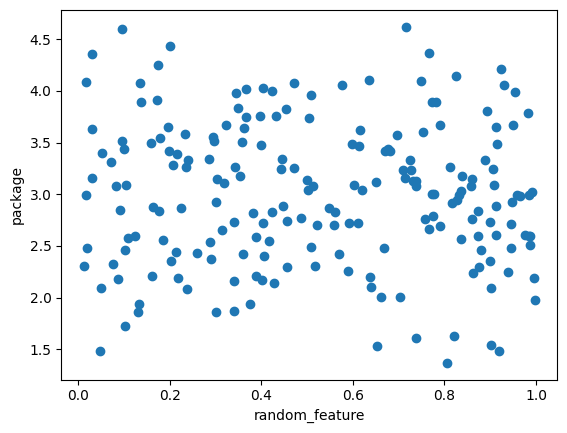

In [109]:
plt.scatter(x=new_df1.iloc[:,1],y=new_df1.iloc[:,2])
plt.xlabel('random_feature')
plt.ylabel('package')

In [110]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [112]:
lr = LinearRegression()

In [113]:
lr.fit(X_train,y_train)

LinearRegression()

In [114]:
y_pred = lr.predict(X_test)

In [115]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7615569987570103


In [116]:
k = 40
n = 2

1 - ((1-r2)*(k-1)/(k-1-n)) #decreased by 2%


0.7486681878790109

In [117]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [118]:
new_df2.sample(5)

,cgpa,iq,package
105,6.66,3.02,2.82
191,7.28,2.78,3.48
66,5.11,2.63,1.63
128,7.93,4.14,3.34
7,6.75,2.18,2.48


Text(0, 0.5, 'Package(in lpa)')

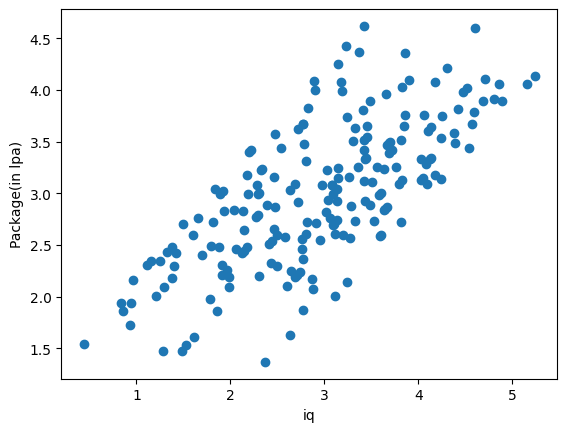

In [119]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [120]:

X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [122]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [123]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.802642871824593


In [124]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.7919749189502467